<h1 style="color:blue;text-align:center"> R Bootcamp - Part I </h1>

<h2 style="color:red;text-align:center"> Venki Uddameri, Ph.D. P.E.</h2>

#### <center> <h4>  Lesson 10 - R Programming - User-Defined Functions </h4> </center>

<hr style="height:4px;border-width:0;background-color:blue">

<h3 style="color:purple">  What are Functions? </h3>

Functions are code snippets that can be written seperately and used to perform a set of calculations.  The use of functions has several advantages:

* It makes the code clean and easy to follow by organizing different parts of the code.
* Write the function once and call it many times within a script.
* Functions can be reused in many scripts
* Functions can be aggregated to create libraries
* User-defined functions can enhance the functionalities of built-in functions


<font color='red'> R provides certain native or built-in functions.  In addition, functions can also available as part of libraries or packages that can be installed from both CRAN and GITHUB.  <b> Finally, R also provides the ability to write your own functions(called User-Defined Functions or UDF) </b> which is the focus of this notebook  </font>

<h3 style="color:purple"> Syntax for Writing User-Defined Functions </h3>

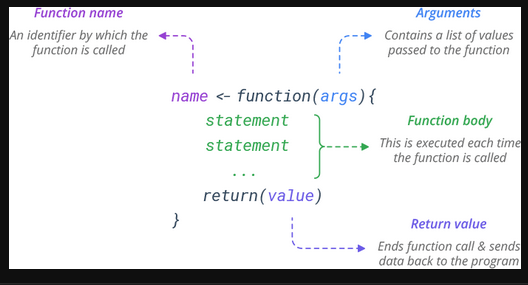

A function is developed using a special function called <b>function </b> which indicates that the object is a function.  A function takes one more more inputs which are referred to as <b> arguments or args </b>.  The code-block of the function is represented within <b> curly brackets {} </p>  A function always returns a value or an object containing several values using the <b> return statement </b>.  <font color='red'> If the function has no return statement, it will return the last computed value </font>.   <b>  A function will always return a value. </b>


<b><font color='blue'> A function has to be loaded into the memory before it can be used. Therefore, it is recommended that functions be written on the top of the script so it available in the remainder of the script </font> </b>

Function example:

Write a function that takes three values a, b, c and adds (a+b) and multiplies this result with c and returns the square root of the product.

$ Y = \sqrt{(a+b)*c} $

RUn the function to compute the result when a = 6, b = 2 and c = 10

In [33]:
# Function
prody <- function(a,b,c)
    {
    z <- (a+b)*c
    z <- sqrt(z)
    return(z)
}

# Main Program
x <- 6
y <- 2
z <- 10
Y <- prody(x,y,z)
print(Y)

[1] 8.944272


<h3 style="color:purple"> Positional versus Keyword Referencing </h3>

<b>Positional referencing</b> is the default approach of passing arguments to a function.  In the above example, x maps to a, y maps to b and z maps to c based on positions they occupy.  However, the keywords (a,b,c) of the arguments can be used to specify how (x,y,z) map to these keywords during a function call.  Let us look at an example to understand <b>keyword</b> referencing: 

In [49]:
M <- prody(x,y,z)  # positional referencing order matters
K <- prody(a=x,c=z,b=y) # order does not matter as key words define which variables correspond to what
print(M)
print(K)

[1] 8.944272
[1] 8.944272


<h3 style="color:purple"> Variable Scope </h3>

When a variable is used within a function then these variables are local to the function.  In a similar manner, the variables in the main program are local to that area. So in the above example:

* a,b,c and z in the function prody are local to that function.  In other words, the values computed within the function cannot be accessed by the main program.  In other words, these variables are local in scope to the function.

* x,y,z in the main program are local to the scope of the main program.  Note that the z in this main program takes up a different part of the memory for storing its value than the z in the function prody which is stored elsewhere.  The function prody does not have access to the memory where z in the main program is stored and same is the case for the function.   


In [31]:
# Function
prody <- function(a,b,c)
    {
    z <- (a+b)*c
    z <- sqrt(z)
    print("The value of z in the function is:")
    print(tracemem(z))  #memory of z in the function
    print(z)
    return(z)
}

# Main Program
x <- 6
y <- 2
z <- 10
print(tracemem(z)) #memory of z in the main program
Y <- prody(x,y,z)
print("The value of z in the main program:")
print(z)

print("The value returned by the function is:")
print(Y)

[1] "<0x562c1535f948>"
[1] "The value of z in the function is:"
[1] "<0x562c15a6f148>"
[1] 8.944272
[1] "The value of z in the main program:"
[1] 10
[1] "The value returned by the function is:"
[1] 8.944272


<h4 style="color:purple"> Global Scope </h4>

It is possible to define variables to have global scope.  While R allows this, <font color='red'> <b> it is highly recommended that we not define variables with global scope as this can create issues with variables changing values and causing different results. </b> </font>

<h3 style="color:purple"> Passing by Value or Reference or Both? </h3>

When you pass by value, the original variables in the main program are not changed and a copy is created and passed to the function.  This approach is commonly used in structural program languages and is most commonly invoked in R, especially of the objects cannot be changed (or are immutable).  On the other hand, some objects of R can also pass-by-reference, which means a pointer to the original value is passed rather than a copy.  Pass-by-Reference is more common in object-oriented programming, especially with objects that are mutable.   You need not worry the mechanism of how R passes values.  But this advanced topic is important to write memory efficient code.  

<h3 style="color:purple"> Function with Vector Arguments </h3>

A function can take vectors (matrices and arrays) as arguments.  The function can parse these values within the function and perform calculations.  Let us write a function to calculate the square-root of elements of a matrix (the same example we did in the last notebook).

In [32]:
# Function to compute the square root of matrix elements
sqrmat <- function(X)
    {
    NX <- ncol(X)  # get number of rows of the matrix
    NY <- nrow(X)  # get the number of columns of the matrix
    b <- mat.or.vec(NY,NX)  # Create a matrix with rows and columns
    for(i in seq(1,NY,1))  # loop through the columns
        {
        for(j in seq(1,NX,1))  # loop through each row
            {
            b[j,i] <- round(sqrt(a[j,i]),3)  # compute the square root of each element of the matrix
            }
        }
    return(b)
    }

# Main Program
# Read the matrix from the csv
a <- read.csv('matrixexample.csv',header=F)  # read the matrix without a header
a <- as.matrix(a)  # convert from a data.frame to a matrix class
z <- sqrmat(a)
print("The Orginal Matrix is:")
print(a)
print("The square root Matrix is:")
print(z)


[1] "The Orginal Matrix is:"
     V1 V2 V3 V4 V5
[1,] 10  4 10 10  4
[2,]  2  6  4 10  1
[3,]  1  5  9  4  3
[4,]  9  1  3  1 10
[5,]  5 10 10  5  9
[1] "The square root Matrix is:"
      [,1]  [,2]  [,3]  [,4]  [,5]
[1,] 3.162 2.000 3.162 3.162 2.000
[2,] 1.414 2.449 2.000 3.162 1.000
[3,] 1.000 2.236 3.000 2.000 1.732
[4,] 3.000 1.000 1.732 1.000 3.162
[5,] 2.236 3.162 3.162 2.236 3.000


<h3 style="color:purple"> A Function with another Function(s) as an Argument </h3>

It is possible to pass other functions as objects to another function.  <b> The idea of passing functions to other functions is part of the  <font color='red'>functional programming paradigm </font> that is supported by R </b>

<font color='blue'> Function taking a Function Example: </font>

Write a function called matcall(a,b,oper) that takes two numbers a and b and performs arithmetic operators (+,-,*,/,%%,%/%) and return the value after the operation is applied to a and b


In [45]:
# Write wrapper functions to perform arithmetic operations
add <- function(a,b)
    {
    c <- a + b
    return(c)
}

sub <- function(a,b)
    {
    c <- a - b
    return(c)
}

multi <- function(a,b)
    {
    c <- a*b
    return(c)
}

division <- function(a,b)
    {
    c <- a/b
    return(c)
}

intdiv <- function(a,b)
    {
    c <- a %/% b
    return(c)
    }

expo <- function(a,b)
    {
    c <- a^b
    return(c)
}

modulus <- function(a,b)  
    {c <- a %% b
     return(c)}

# Write the matcall function
matcall <- function(a,b,oper)
    {
    c <- oper(a,b)
    return(c)
}

# Illustrate with an example
a <- 8
b <- 5
matcall(a,b,expo)  # calls exponent function
matcall(a,b,modulus) # calls modulus function
matcall(a,b,intdiv) # calls integer division function

[1] 32768

[1] 3

[1] 1

<h3 style="color:purple"> Passing Additional Arguments using Ellipsis </h3>

You will sometimes notice three-dots or ellipsis (...) seen as a function argument.  This is done to send additional parameters that may be required or may allowed to be changed.  This approach is also useful to send a variable number of arguments.  <b> Water

In [2]:
# A simple illustration of using ellipsis
ellipsisfun <- function(x, ...) {

print(paste("Class of regular-argument:", class(x)))

print(paste("Number of ellipsis-arguments:", length(list(...))))

}
# Call the function in the main program with variable arguments
ellipsisfun(4,1,3,4)  # passing 3 arguments
ellipsisfun(4,list(1,3,4))  # Passing 1 (list) argument
ellipsisfun(4,list(1,3,4),5) #Passing two arguments



[1] "Class of regular-argument: numeric"
[1] "Number of ellipsis-arguments: 3"
[1] "Class of regular-argument: numeric"
[1] "Number of ellipsis-arguments: 1"
[1] "Class of regular-argument: numeric"
[1] "Number of ellipsis-arguments: 2"


<h3 style="color:purple"> Summary</h3>

In this notebook we looked at user-defined functions (UDF).  UDF in conjunction with built-in functions and other functions available in the libraries provide additional opportunities to expand the versitility of R.  <b>  It is best to think and identify repetitive calculations to ensure they are coded as <font color="red"> functions.  